In [1]:
import numpy as np
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt

In [20]:
# 数据加载
G = nx.read_gml('dolphins.gml')
# print(type(G))
# print(len(G))
print(G)

In [3]:
# 定义可视化
def plot_graph(G):
    plt.figure(figsize=(20,10))
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G,pos,edgelist = edges)
    nx.draw_networkx_nodes(G,pos,nodelist = G.nodes(),node_size = 200,node_color = "r",alpha = 0)
    nx.draw_networkx_edges(G,pos,edgelist = edges,alpha = 0)
    plt.show()


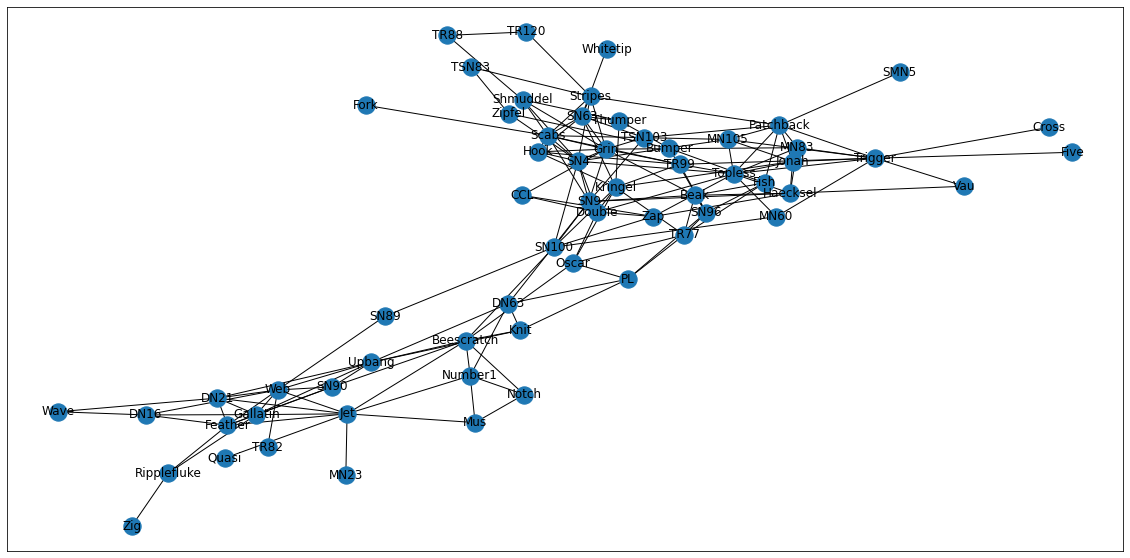

In [4]:
# 可视化
plot_graph(G)


In [5]:
print(G.nodes)

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


In [21]:
print(G)

In [7]:
# 构建GCN
# 邻接矩阵
order = sorted(list(G.nodes()))
A = to_numpy_matrix(G,nodelist = order)

In [8]:
# 加上对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A + I

In [9]:
# 度矩阵
D_array = np.array(np.sum(A_hat,axis = 0))

In [10]:
D_hat = D_array[0]

In [11]:
# 生成对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
D_hat

matrix([[7., 0., 0., ..., 0., 0., 0.],
        [0., 9., 0., ..., 0., 0., 0.],
        [0., 0., 5., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 6., 0., 0.],
        [0., 0., 0., ..., 0., 2., 0.],
        [0., 0., 0., ..., 0., 0., 4.]])

In [12]:
# 初始化权重,采用正态分布(0,1)
w_1 = np.random.normal(loc = 0,scale = 1,size = (G.number_of_nodes(),4))
w_2 = np.random.normal(loc = 0,size = (w_1.shape[-1],2))


In [13]:
def relu(x):
    return (abs(x)+x)/2

In [14]:
# GCN层
def gcn_layer(A_hat,D_hat,X,w):
    return relu(D_hat**-1 * A_hat * X * w)
H_1 = gcn_layer(A_hat,D_hat,I,w_1)
H_2 = gcn_layer(A_hat,D_hat,H_1,w_2)
output = H_2
output

matrix([[0.        , 0.10128601],
        [0.        , 0.2202732 ],
        [0.        , 0.07323893],
        [0.        , 0.25629757],
        [0.        , 0.63324446],
        [0.        , 0.06911103],
        [0.        , 0.12196571],
        [0.        , 0.22388251],
        [0.        , 0.10748083],
        [0.        , 0.16441179],
        [0.        , 0.04522419],
        [0.        , 0.46830625],
        [0.        , 0.2069815 ],
        [0.        , 0.17031247],
        [0.        , 0.06149694],
        [0.        , 0.        ],
        [0.        , 0.05874452],
        [0.        , 0.16930925],
        [0.        , 0.        ],
        [0.        , 0.2652947 ],
        [0.        , 0.06035592],
        [0.        , 0.        ],
        [0.        , 0.52548813],
        [0.        , 0.12478022],
        [0.        , 0.        ],
        [0.        , 0.14082409],
        [0.        , 0.14427497],
        [0.        , 0.16201032],
        [0.        , 0.1583323 ],
        [0.   

In [15]:
# 提取特征
feature_representation = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representation[nodes[i]] = np.array(output)[i]
feature_representation

{'Beak': array([0.        , 0.10128601]),
 'Beescratch': array([0.       , 0.2202732]),
 'Bumper': array([0.        , 0.07323893]),
 'CCL': array([0.        , 0.25629757]),
 'Cross': array([0.        , 0.63324446]),
 'DN16': array([0.        , 0.06911103]),
 'DN21': array([0.        , 0.12196571]),
 'DN63': array([0.        , 0.22388251]),
 'Double': array([0.        , 0.10748083]),
 'Feather': array([0.        , 0.16441179]),
 'Fish': array([0.        , 0.04522419]),
 'Five': array([0.        , 0.46830625]),
 'Fork': array([0.       , 0.2069815]),
 'Gallatin': array([0.        , 0.17031247]),
 'Grin': array([0.        , 0.06149694]),
 'Haecksel': array([0., 0.]),
 'Hook': array([0.        , 0.05874452]),
 'Jet': array([0.        , 0.16930925]),
 'Jonah': array([0., 0.]),
 'Knit': array([0.       , 0.2652947]),
 'Kringel': array([0.        , 0.06035592]),
 'MN105': array([0., 0.]),
 'MN23': array([0.        , 0.52548813]),
 'MN60': array([0.        , 0.12478022]),
 'MN83': array([0., 0